# Estudi de l’estat de polarització de la llum i els seus canvis quan es reflecteix en una superfície que separa dos medis dielèctrics i isòtrops

**1)** En aquest exercici estudiareu l’estat de polarització de la llum i els seus canvis quan la llum es reflecteix en una superfície que separa dos medis dielèctrics i isòtrops (també seran lineals,  homogenis i elèctricament neutres) d’índexs n i n’, amb n$>$n’. 

In [3]:
# Importació de llibreries

import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

In [9]:
# Definició de variables 

nt=1.0;
ni=1.5;
num_punts=200;
thetai=np.linspace(0.01, np.pi/2, num=num_punts,dtype=complex);
thetat=(np.arcsin(ni*np.sin(thetai)/nt));

theta_brewster=np.arctan(nt/ni)
theta_brewster_formatted = f"{theta_brewster:.3f}"

theta_lim=np.arcsin(nt/ni)
theta_lim_formatted = f"{theta_lim:.3f}"

display(Math(f"\\theta_{{brewster}} = {theta_brewster_formatted}"))
display(Math(f"\\theta_{{lim}} = {theta_lim_formatted}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**i)** Prepareu un codi per a pintar l’el·lipse de polarització d’una ona amb dues components perpendiculars $E_x$ i $E_y$ d’amplituds diferents i desfasades entre si. Per a fer l’animació en Python, podeu utilitzar les següents línies de codi: \\

``` 
for j in range(N):
clear_output(wait=True)
plt.figure(num=1,figsize=(5, 5))
plt.plot(Ex[0:j],Ey[0:j], 'ro')
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.show()
```

on N correspon al nombre de punts que volem simular i Ex i Ey són les components del camp elèctric en cada instant de temps.

Recordeu importar les llibreries:

```
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
```

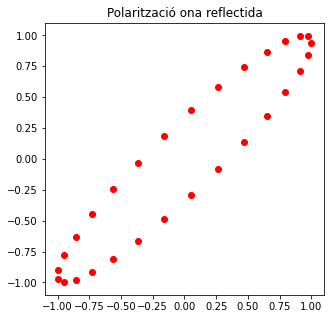

In [11]:
A=1;

Ax=A;
Ay=A;

phase_rel_a=20;
print(phase_rel_a*np.pi/180)

w=1;
num_punts=30;
t=np.linspace(0, 2*np.pi/w, num=num_punts);

Ex=Ax*np.cos(w*t);
Ey=Ay*np.cos(w*t+phase_rel_a*np.pi/180);
clear_output(wait=True)

for j in range(num_punts):
    clear_output(wait=True)
    plt.figure(num=1,figsize=(5, 5))
    plt.title('Polarització ona reflectida')
    plt.plot(Ex[0:j],Ey[0:j], 'ro')
    plt.xlim(-1.1,1.1)
    plt.ylim(-1.1,1.1)
    #time.sleep(0.01)
    plt.show()
    

**ii)** Trieu dos medis d’índexs n i n' (n$>$n’). Representeu els coeficients de reflexió de Fresnel paral·lel i perpendicular en funció de l’angle d’incidència, entre 0 i 90$^o$, que inclou angles per sota i per sobre de l’angle límit. Podeu utilitzar les mateixes expressions per a tots els angles, ja que numpy els calcularà igual encara que hi aparegui un angle complex (sempre i quan especifiqueu que el dtype del vostre array sigui 'complex'). Com que en alguns casos us donaran coeficients complexes, representeu el seu mòdul i la seva fase amb np.abs i np.angle, respectivament.\\

Per definir l'array de l'angle d'incidència podeu fer servir la següent linia de codi:

```
thetai=np.linspace(0.01, np.pi/2, num=num_punts,dtype=complex);
```

In [12]:
#Fresnel Coefficients

rs=np.sin(thetat-thetai)/np.sin(thetai+thetat);
rp=np.tan(thetat-thetai)/np.tan(thetai+thetat);

abs_rs=np.zeros((len(thetai),1),dtype=complex)
abs_rp=np.zeros((len(thetai),1),dtype=complex)

# modulus rp and rs
rp_mod=np.abs(rp);
rs_mod=np.abs(rs);

# phases rp and rs
phase_p=np.zeros((len(thetai),1),dtype=int)
phase_s=np.zeros((len(thetai),1),dtype=int)
for i in range(len(thetai)):
    phase_p[i,0]=np.angle(rp[i])*180/np.pi;
    phase_s[i,0]=np.angle(rs[i])*180/np.pi;

phase_rel=phase_s-phase_p;

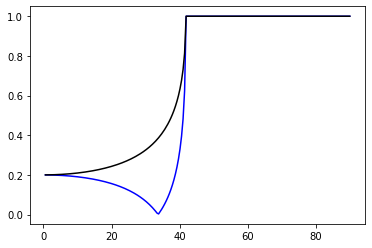

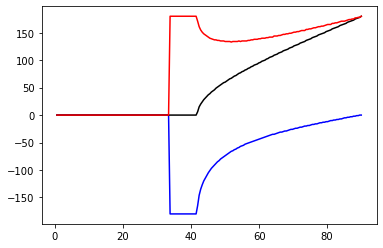

In [15]:
# Plot modulus and phases

plt.figure(1)
plt.plot(thetai.real*180/np.pi,rp_mod,'b')
plt.plot(thetai.real*180/np.pi,rs_mod,'k')

plt.figure(2)
plt.plot(thetai.real*180/np.pi,phase_p,'b')
plt.plot(thetai.real*180/np.pi,phase_s,'k')
plt.plot(thetai.real*180/np.pi,phase_rel,'r')

**iii)** Per una ona incident polaritzada linealment a 45o del pla d’incidència, representeu l’estat de polarització de l’ona reflectida en els següents casos: 

- Per un angle d’incidència menor a l'angle de Brewster i a l’angle límit.
- item Per un angle d’incidència major a l'angle de Brewster i menor a l’angle límit.
- item Per un angle d’incidència major a l’angle límit.

Justifiqueu per què l’estat de polarització canvia, i expliqueu per què el comportament és diferent per sota o per sobre de l’angle límit.
Tingueu en compte que, amb el criteri de signes que utilitza el J. Casas, quan mirem el feix reflectit l’eix de la component paral·lela del camp elèctric està girat (i.e. canviat de signe). Tingueu-ho en compte quan pinteu l’el·lipse de polarització.

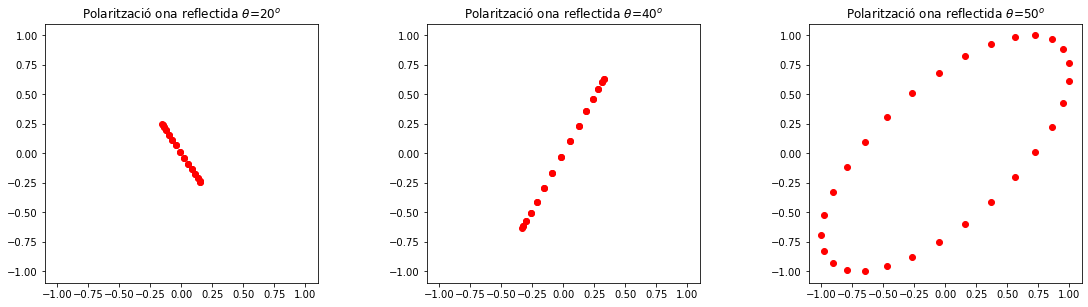

In [16]:
A=1;
theta_inc=[20,40,50] #graus

plt.figure(figsize=(18, 18))
plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0)
#plt.rcParams['text.usetex'] = True


for n in range(3):
    # add a new subplot iteratively
    ax = plt.subplot(1, 3, n + 1)
    
    idx=np.where(np.real(thetai) > theta_inc[n]*np.pi/180) 
    print(thetai[idx[0][0]])

    Ax=A*rp_mod[idx][0];
    Ay=A*rs_mod[idx][0];

    phase_rel_a=phase_rel[idx][0];
    print(phase_rel_a*np.pi/180)

    w=1;
    num_punts=30;
    t=np.linspace(0, 2*np.pi/w, num=num_punts);

    Ex=Ax*np.cos(w*t);
    Ey=Ay*np.cos(w*t+phase_rel_a*np.pi/180);
    clear_output(wait=True)
    
    ax.plot(-1*Ex[0:j],Ey[0:j], 'ro')
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    ax.set_title(r'Polarització ona reflectida $\theta$=%i$^o$' %theta_inc[n])
    #ax.set_title(r'$\beta \rho \lambda \xi$')
    
    plt.subplots_adjust(left=0.1,
                    bottom=0.4, 
                    right=0.9, 
                    top=0.6, 
                    wspace=0.4, 
                    hspace=0.4)
